In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [8]:
# change the date to a datetime object and reset it as the index:
df.Date = pd.to_datetime(df.Date)

In [9]:
df = df.set_index('Date')

In [10]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [11]:
# create a month column:
df['Month'] = df.index.month_name()

In [12]:
df.head(3)

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January


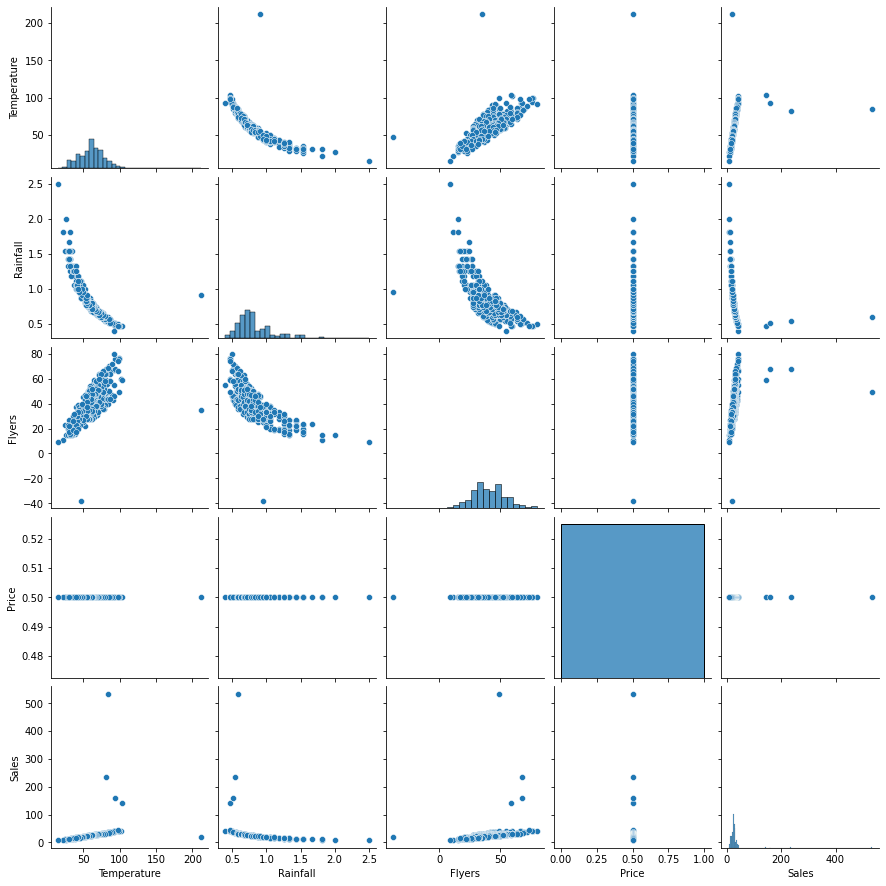

In [13]:
sns.pairplot(df)

Day


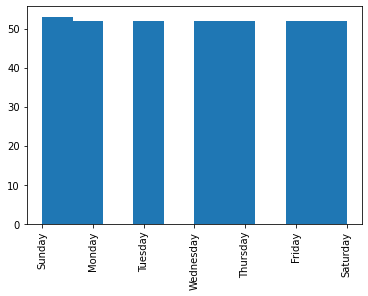

Temperature


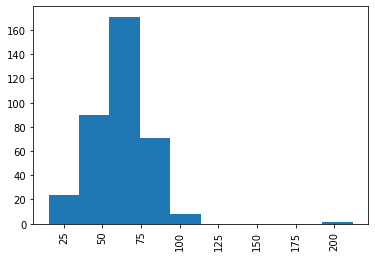

Rainfall


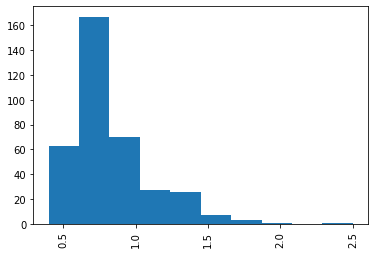

Flyers


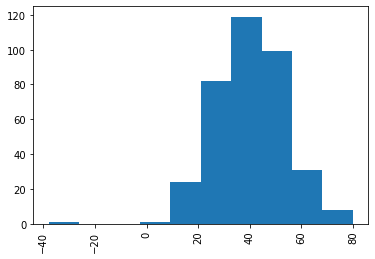

Price


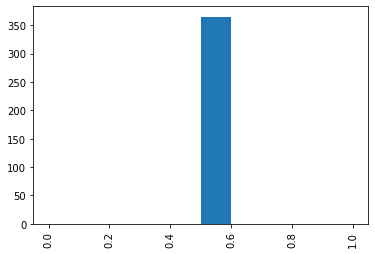

Sales


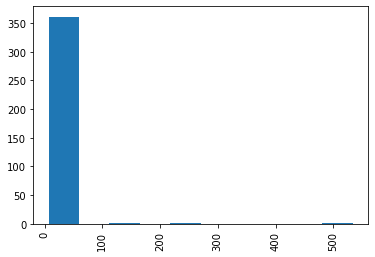

Month


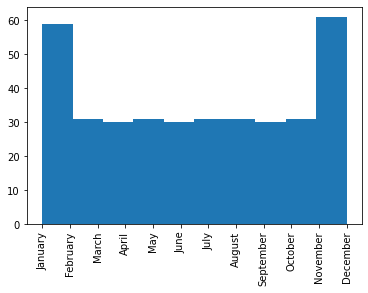

In [14]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.xticks(rotation = 90)
    plt.show()

In [15]:
def get_low_and_up_bounds_df(df, k=1.5):
    '''
    This function takes in a pandas dataframe, list of columns, and k value, and will print out upper and lower bounds for each column.
    It takes in a default argument of the col_list being all numeric columns, and the k value=1.5
    '''
    from IPython.display import display, display_html
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    for col in col_list:
        # Find the lower and upper quartiles
        q_25, q_75 = df[col].quantile([0.25, 0.75])
        # Find the Inner Quartile Range
        q_iqr = q_75 - q_25
        # Find the Upper Bound
        q_upper = q_75 + (k * q_iqr)
        # Find the Lower Bound
        q_lower = q_25 - (k * q_iqr)
        # Identify outliers
        outliers_lower = df[df[col] < q_lower]
        outliers_upper = df[df[col] > q_upper]
        # outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0)
        print('')
        print(col)
        print(f'K: {k}')
        print(f'Lower Fence: {q_lower}')
        print(f'Upper Fence: {q_upper}')
        print('')
        print(f'Lower Outliers in {col}')
        print('')
        display(outliers_lower)
        print('')
        print(f'Upper Outliers in {col}')
        print('')
        display (outliers_upper)
        print('')
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df, x = col, kde=True)
        plt.axvline(x = q_lower, color = 'orange')
        plt.axvline(x = q_upper, color= 'orange')
        plt.title(col)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df, whis = k)
        plt.title(col)
        plt.show()
        print('-------------------------------------------------------------------')


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December



Upper Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


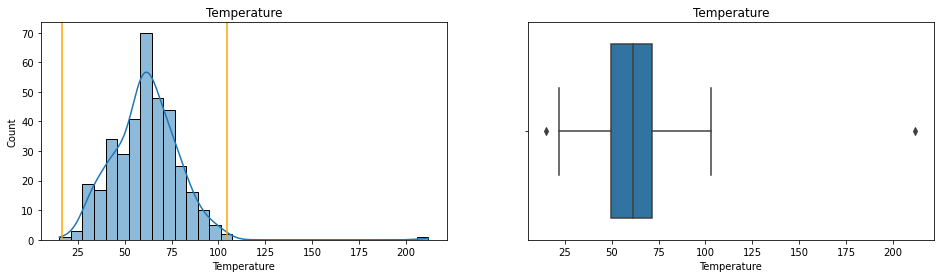

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


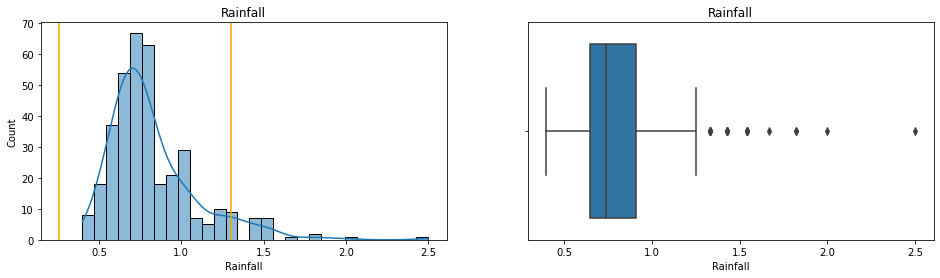

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November



Upper Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July


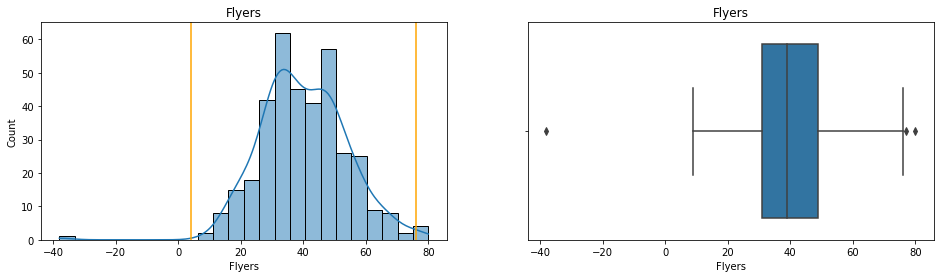

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


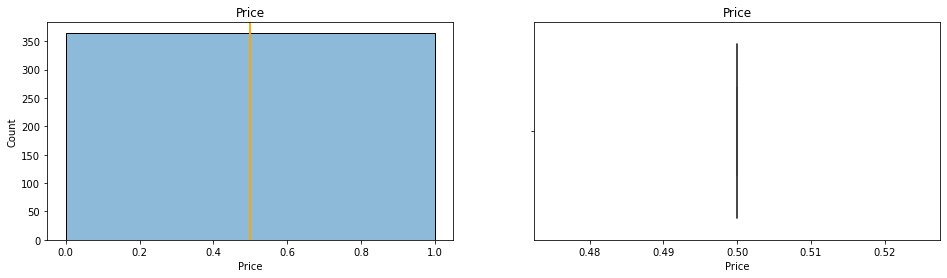

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


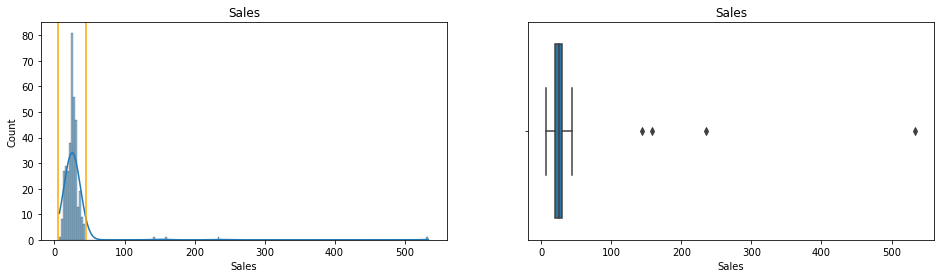

-------------------------------------------------------------------


In [16]:
get_low_and_up_bounds_df(df)

Rainfall

ther is not lower outliers
there is a value about 2.5


Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Flyers
Date,
2017-11-21,-38



Upper Outliers in Flyers



,Flyers
Date,
2017-06-16,77
2017-07-14,80


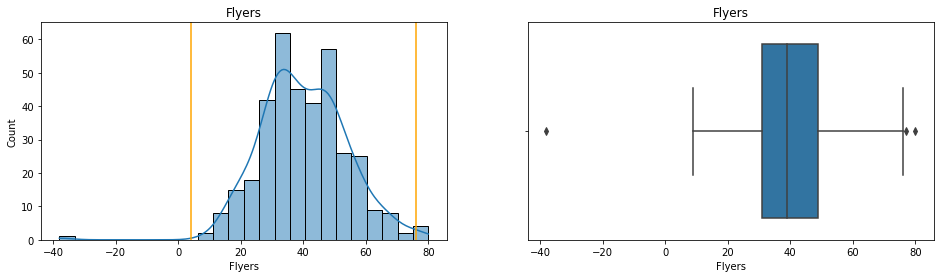

-------------------------------------------------------------------


In [17]:
get_low_and_up_bounds_df(df[['Flyers']])

Flyers: -38 value it does not make sense


Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Price
Date,



Upper Outliers in Price



,Price
Date,


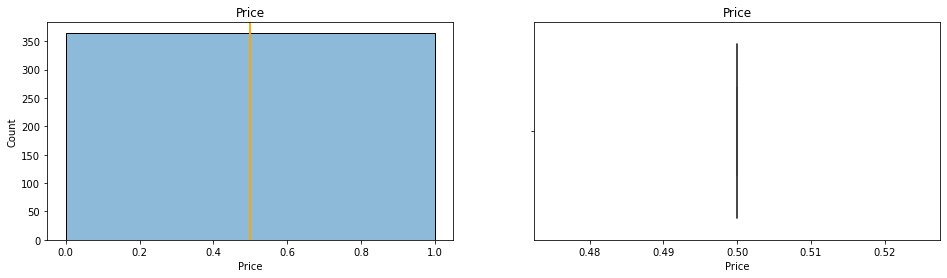

-------------------------------------------------------------------


In [18]:
get_low_and_up_bounds_df(df[['Price']])

Note: no outliers in Price


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature



,Temperature
Date,
2017-12-31,15.1



Upper Outliers in Temperature



,Temperature
Date,
2017-02-11,212.0


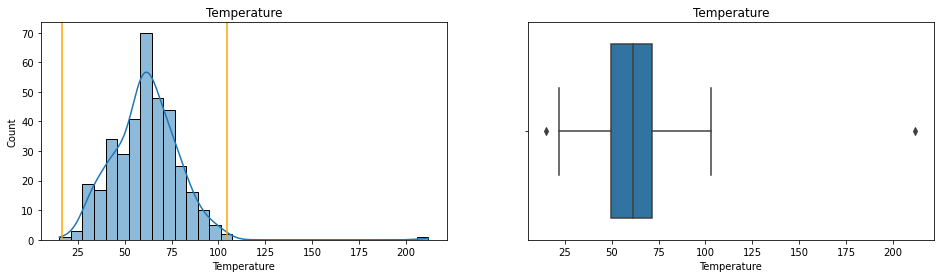

-------------------------------------------------------------------


In [19]:
get_low_and_up_bounds_df(df[['Temperature']])

temperature -I should keep the lower outliers, it does not make sense to keep the upper outlier


Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales



,Sales
Date,



Upper Outliers in Sales



,Sales
Date,
2017-07-01,143
2017-07-02,158
2017-07-03,235
2017-07-04,534


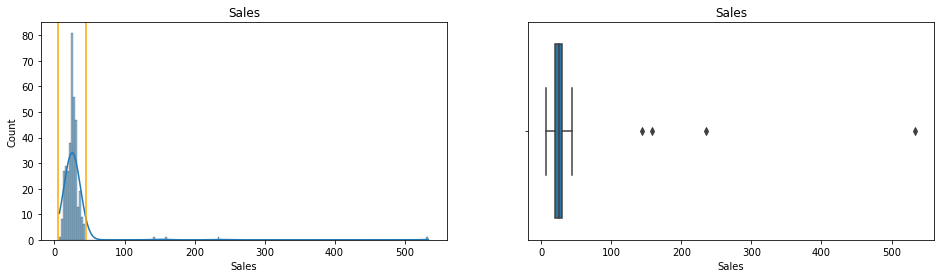

-------------------------------------------------------------------


In [20]:
get_low_and_up_bounds_df(df[['Sales']])


Note: no lower outliers but there are upper outliers > 500 ?

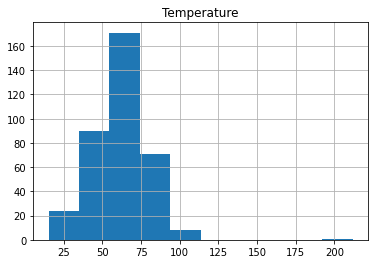

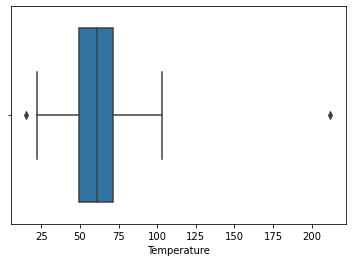

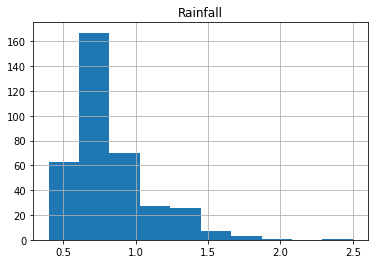

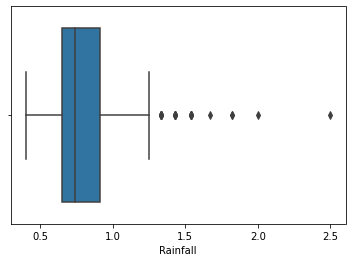

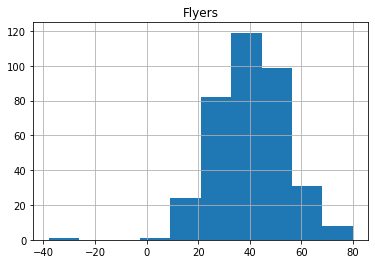

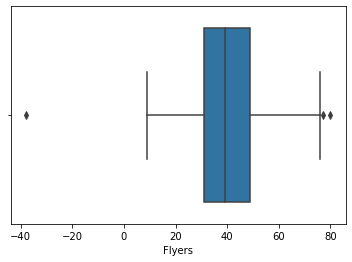

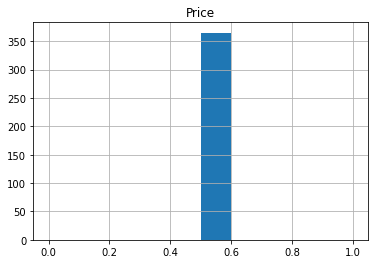

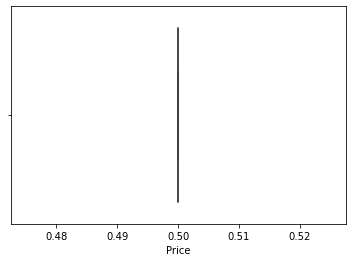

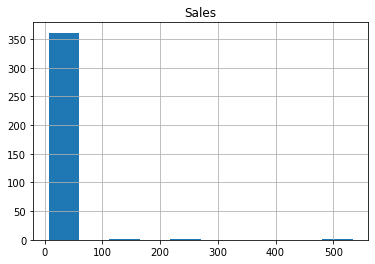

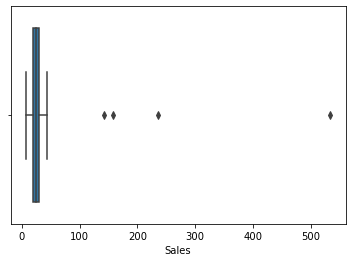

In [22]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

In [24]:
def get_lower_and_upper_bounds2(df, k = 1.5):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            # get the Q1 and Q3 values
            q1 = df.Temperature.quantile(0.25)
            q3 = df.Temperature.quantile(0.75)
            # Find the Inner Quartile Range
            iqr = q3 - q1
            # Find the Upper Bound
            q_upper = q3 + (k * iqr)
            # Find the Lower Bound
            q_lower = q1 - (k * iqr)
            outliers_lower = df[(df[col] < q_lower)]
            outliers_upper = df[(df[col] > q_upper)]
            print ('***', col, '***')
            print ('lower quartile value: ', q1)
            print ('Upper quartile value: ', q3)
            print(' ')
            print(f'Lower Outliers in {col}')
            print('')
            print(outliers_lower)
            print('')
            print(f'Upper Outliers in {col}')
            print('')
            print(outliers_upper)
            print('')
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = col, kde=True)
            plt.plot([2.8, 2.8], [0, max(df)])
            plt.title(col)
#             plt.plot([q_lower, q_lower], [0, df[col].median()], color = 'orange')
#             plt.plot([q_upper, q_upper], [0, df[col].median()], color = 'orange')
            plt.subplot(1, 2, 2)
            sns.boxplot(x=col, data=df)
            plt.title(col)
            plt.show()
            print('-------------------------------------------------------------------')
            print('')

*** Temperature ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Temperature

               Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                     
2017-12-31  Sunday         15.1       2.5       9    0.5      7  December

Upper Outliers in Temperature

                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February



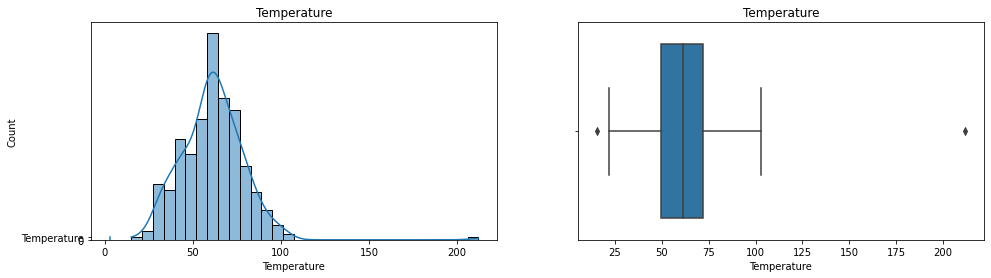

-------------------------------------------------------------------

*** Rainfall ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Rainfall

                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                        
2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
2017-01-02     Monday         28.9      1.33      15    0.5     13   January
2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
2017-01-04  Wednesday         44.1      1.05      28    0.5     17   January
2017-01-05   Thursday         42.4      1.00      33    0.5     18   January
...               ...          ...       ...     ...    ...    ...       ...
2017-12-27  Wednesday         42.7      1.00      33    0.5     19  December
2017-12-28   Thursday         37.8      1.25      32    0.5     16  December
2017-12-29     Friday         39.5      1.25      17    0.

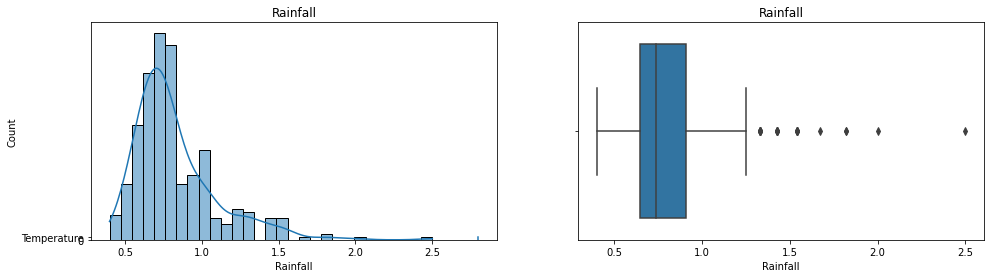

-------------------------------------------------------------------

*** Flyers ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Flyers

                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-01-01    Sunday         27.0      2.00      15    0.5     10   January
2017-01-02    Monday         28.9      1.33      15    0.5     13   January
2017-01-12  Thursday         38.2      1.33      16    0.5     14   January
2017-01-21  Saturday         36.2      1.25      16    0.5     14   January
2017-01-28  Saturday         34.9      1.33      15    0.5     13   January
2017-11-21   Tuesday         47.0      0.95     -38    0.5     20  November
2017-12-04    Monday         34.9      1.54      16    0.5     13  December
2017-12-05   Tuesday         22.0      1.82      11    0.5     10  December
2017-12-10    Sunday         31.3      1.82      15    0.5     11  Decem

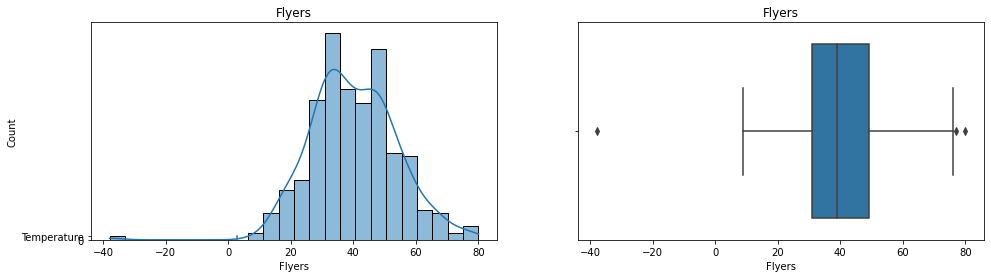

-------------------------------------------------------------------

*** Price ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Price

                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                        
2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
2017-01-02     Monday         28.9      1.33      15    0.5     13   January
2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
2017-01-04  Wednesday         44.1      1.05      28    0.5     17   January
2017-01-05   Thursday         42.4      1.00      33    0.5     18   January
...               ...          ...       ...     ...    ...    ...       ...
2017-12-27  Wednesday         42.7      1.00      33    0.5     19  December
2017-12-28   Thursday         37.8      1.25      32    0.5     16  December
2017-12-29     Friday         39.5      1.25      17    0.5     

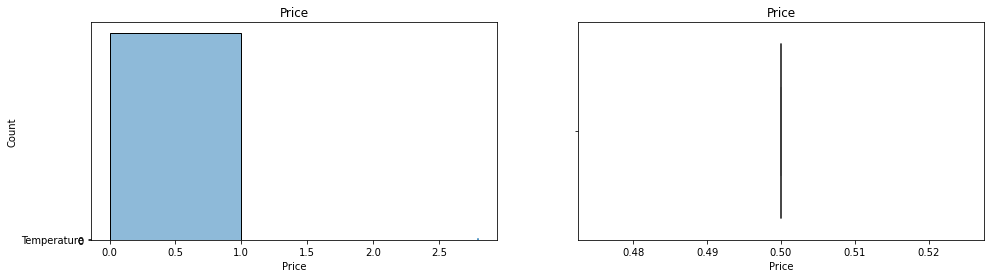

-------------------------------------------------------------------

*** Sales ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Sales

                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                        
2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
2017-01-02     Monday         28.9      1.33      15    0.5     13   January
2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
2017-01-06     Friday         25.3      1.54      23    0.5     11   January
2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
2017-01-08     Sunday         37.5      1.18      28    0.5     15   January
2017-01-11  Wednesday         32.6      1.54      23    0.5     12   January
2017-01-12   Thursday         38.2      1.33      16    0.5     14   January
2017-01-13     Friday         37.5      1.33      19    0.5     

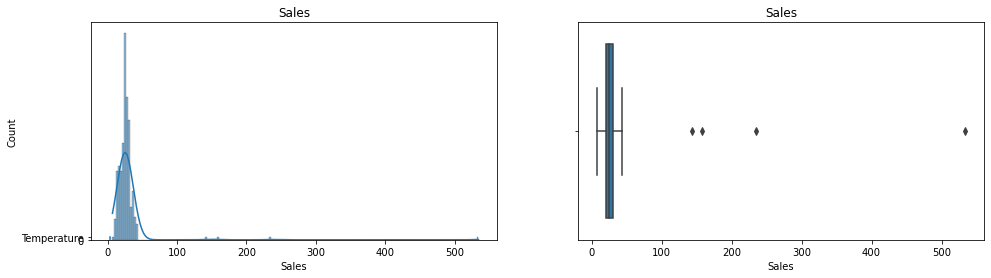

-------------------------------------------------------------------



In [25]:
get_lower_and_upper_bounds2(df)


Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


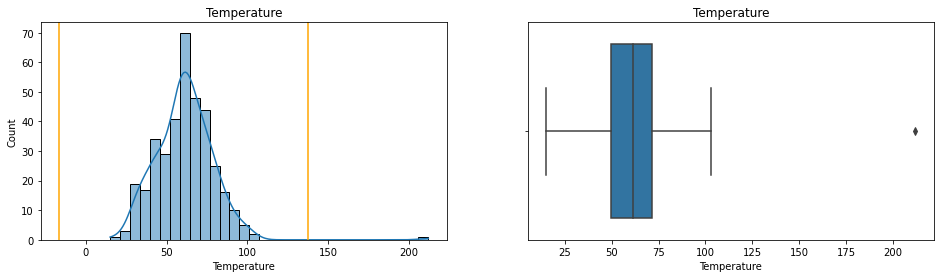

-------------------------------------------------------------------

Rainfall
K: 3
Lower Fence: -0.13
Upper Fence: 1.69

Lower Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


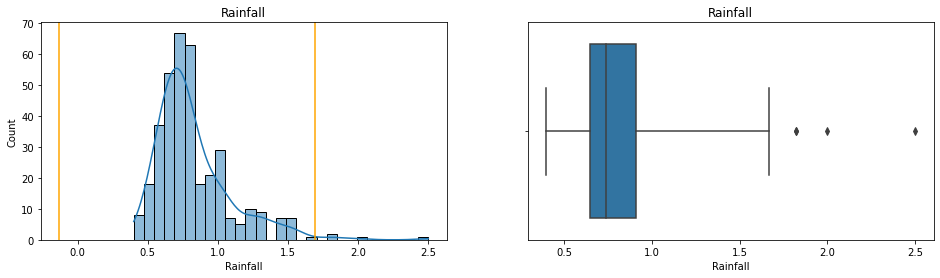

-------------------------------------------------------------------

Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November



Upper Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


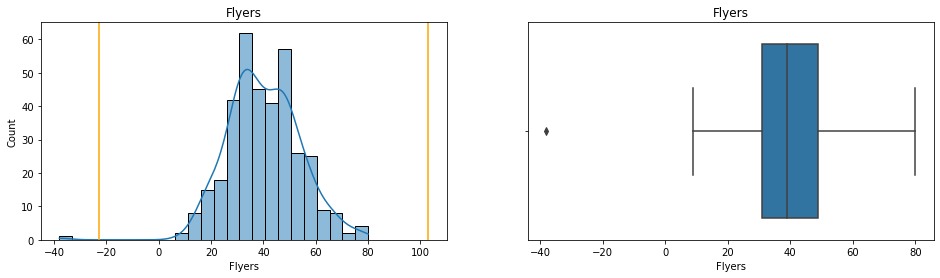

-------------------------------------------------------------------

Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


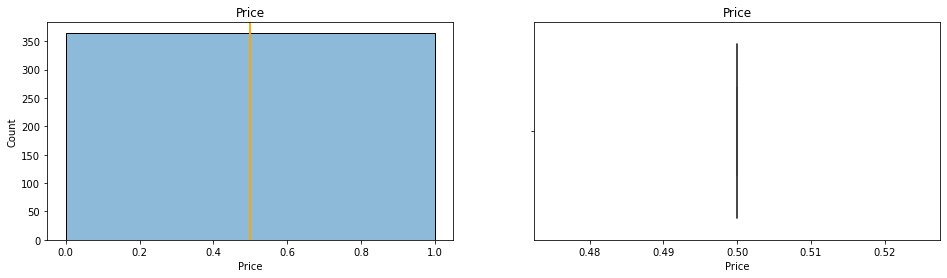

-------------------------------------------------------------------

Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


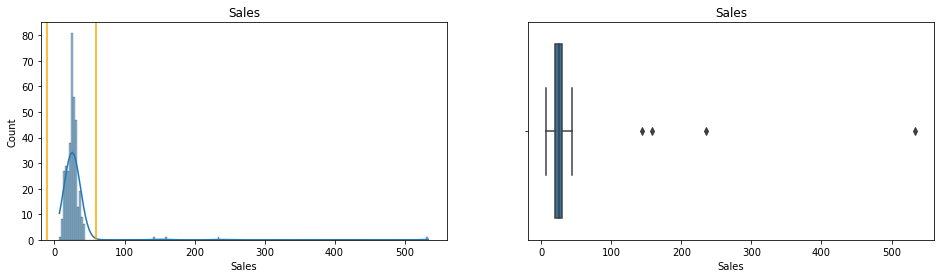

-------------------------------------------------------------------


In [26]:
get_low_and_up_bounds_df(df, k=3)


Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature



,Temperature
Date,



Upper Outliers in Temperature



,Temperature
Date,
2017-02-11,212.0


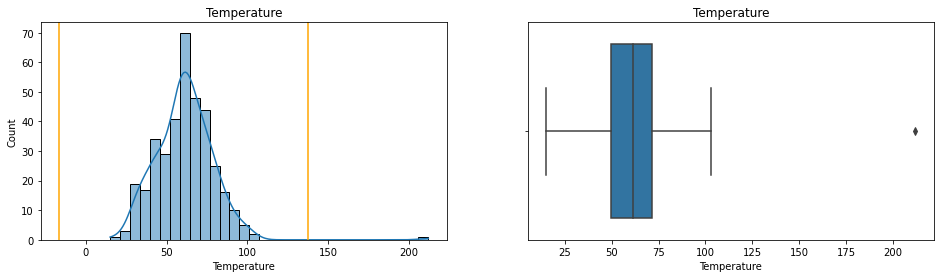

-------------------------------------------------------------------


In [27]:
get_low_and_up_bounds_df(df[['Temperature']], k = 3)

note: there is not lower outliers but there are less upper lowers than when we used k=1.5


Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers



,Flyers
Date,
2017-11-21,-38



Upper Outliers in Flyers



,Flyers
Date,


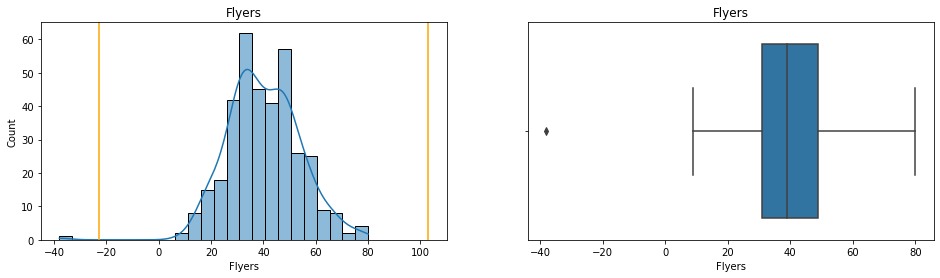

-------------------------------------------------------------------


In [28]:
get_low_and_up_bounds_df(df[['Flyers']], k = 3)

NOTE:there is not upper outliers. but there is still one lower outlier -38 which it does not make sense


Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Price
Date,



Upper Outliers in Price



,Price
Date,


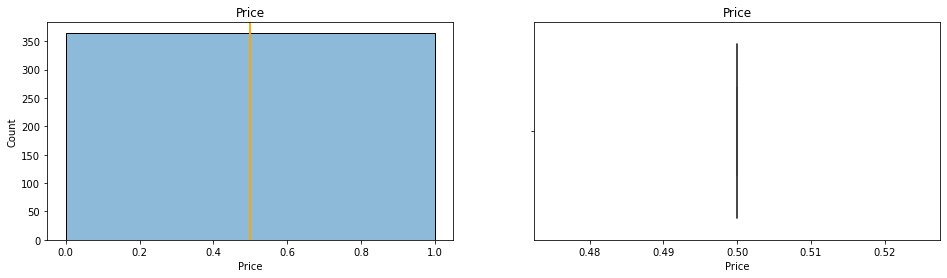

-------------------------------------------------------------------


In [29]:
get_low_and_up_bounds_df(df[['Price']], k = 3)


Note: there are not outliers at al


Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales



,Sales
Date,



Upper Outliers in Sales



,Sales
Date,
2017-07-01,143
2017-07-02,158
2017-07-03,235
2017-07-04,534


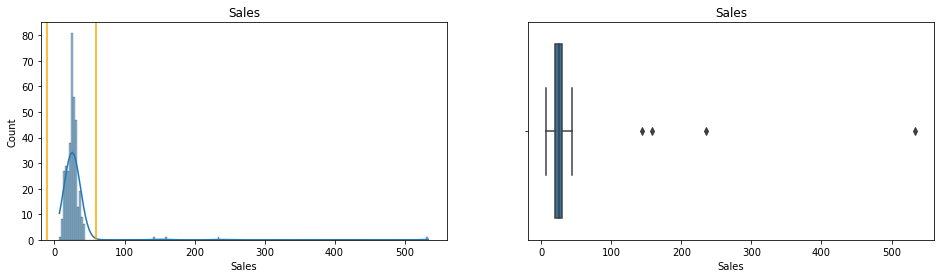

-------------------------------------------------------------------


In [30]:
get_low_and_up_bounds_df(df[['Sales']], k = 3)

Note: there is not lower outliers but there are upper outliers we can use to see the max sales over all


Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Temperature



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


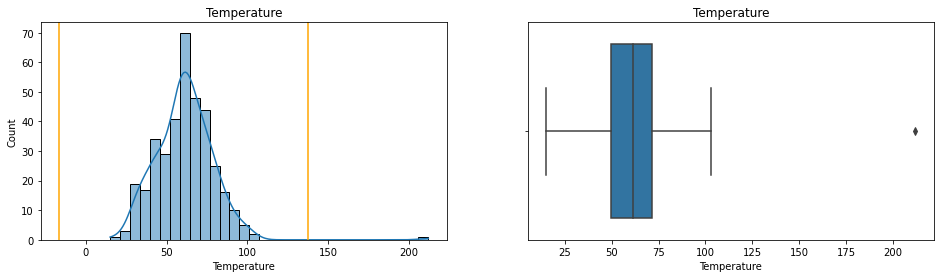

-------------------------------------------------------------------

Rainfall
K: 3
Lower Fence: -0.13
Upper Fence: 1.69

Lower Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Rainfall



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


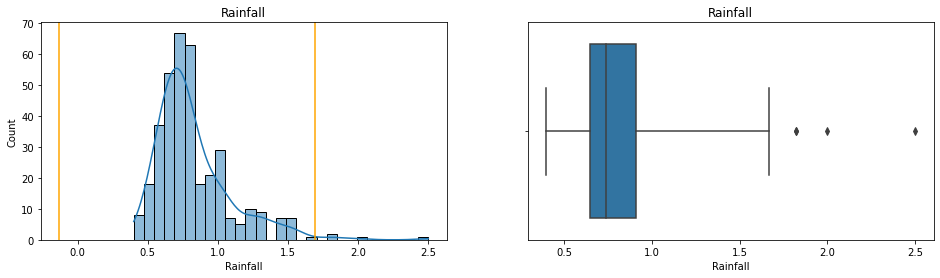

-------------------------------------------------------------------

Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November



Upper Outliers in Flyers



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


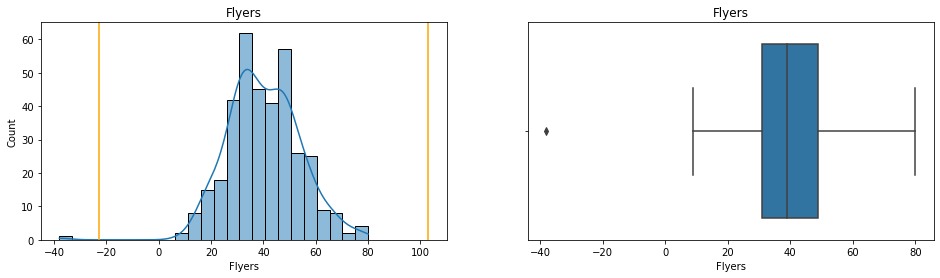

-------------------------------------------------------------------

Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Price



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


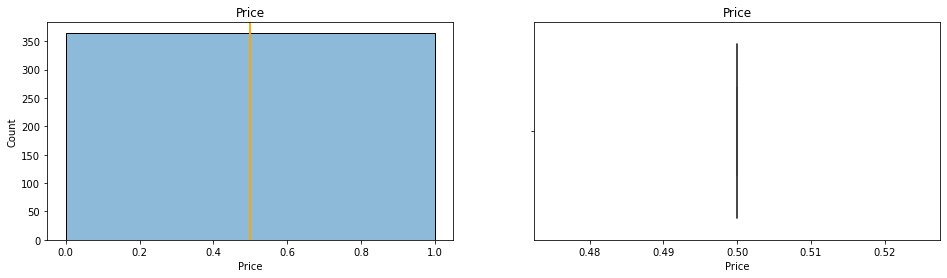

-------------------------------------------------------------------

Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,



Upper Outliers in Sales



,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


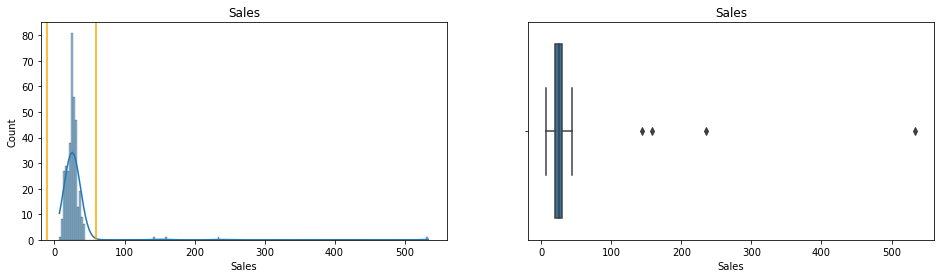

-------------------------------------------------------------------


In [31]:
get_low_and_up_bounds_df(df, k=3)

Takeaways

July 4 has high sales,
negative flier valuer needs to be fixed. it does not make sense
there is a day with really high temperature

**Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:**

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [33]:
norcols = ['Temperature', 'Rainfall', 'Flyers']

In [34]:
for col in norcols:
    df['z_score_'+ col] = (df[col] - df[col].mean()) / df[col].std()
    print(col)
    display(df[df['z_score_' + col].abs() > 2])
    print('-------\n')


Temperature


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251
2017-06-26,Monday,102.6,0.47,60,0.5,42,June,2.287714
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2.304301
2017-07-10,Monday,98.0,0.49,66,0.5,40,July,2.033372
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251
2017-07-22,Saturday,99.6,0.47,49,0.5,42,July,2.121838
2017-07-27,Thursday,97.9,0.47,74,0.5,43,July,2.027843
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,-2.168799


-------

Rainfall


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall
Date,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488
2017-01-06,Friday,25.3,1.54,23,0.5,11,January,-1.986336,2.606983
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January,-1.566119,2.606983
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January,-1.582706,2.606983
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,-1.693290,3.081626
2017-01-17,Tuesday,32.2,1.43,26,0.5,14,January,-1.604823,2.205363
2017-01-20,Friday,31.6,1.43,20,0.5,12,January,-1.637998,2.205363
2017-01-24,Tuesday,28.6,1.54,20,0.5,12,January,-1.803873,2.606983
2017-12-04,Monday,34.9,1.54,16,0.5,13,December,-1.455535,2.606983


-------

Flyers


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251,-1.299691,2.676244
2017-06-20,Tuesday,85.1,0.54,70,0.5,37,June,1.320109,-1.044114,2.168499
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,1.828792,-1.299691,2.603709
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,1.779030,-1.153647,2.023429
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,1.121058,-1.044114,2.023429
2017-07-14,Friday,92.0,0.50,80,0.5,40,July,1.701621,-1.190158,2.893849
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251,-1.299691,2.603709
2017-07-23,Sunday,89.1,0.51,72,0.5,37,July,1.541275,-1.153647,2.313569
2017-07-24,Monday,83.5,0.57,69,0.5,35,July,1.231642,-0.934581,2.095964


-------



In [35]:
def outiers_sigma(df, norcols, sigma = 2):
    for col in norcols:
        df['z_score_'+ col] = (df[col] - df[col].mean()) / df[col].std()
        print(col)
        display(df[df['z_score_' + col].abs() > sigma])
        print('-------\n')

**Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv**

In [36]:
outiers_sigma(df, norcols, sigma = 3)

Temperature


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227


-------

Rainfall


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488,-1.820927
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,-1.693290,3.081626,-1.168112
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,-2.168799,3.629291,-2.111067
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,-1.654586,3.629291,-1.820927
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,-2.550311,6.112037,-2.256137


-------

Flyers


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,-0.786506,0.452836,-5.665283


-------



things we will need to address/investigate:

extreme temperature error value
negative flyer error value

In [37]:
#check a range where the negative value is in
df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,-0.294409,0.160748,-0.442762
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,-0.310997,0.160748,0.064983
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,-0.786506,0.452836,-5.665283
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,-0.692510,0.635391,-0.007552
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,-0.515576,0.160748,0.500194


assessment suggests that the input of the data was a clerical error
fix: change the negative value to positive, presume real value is positive 38

In [38]:
# assing vales again to Flyers (absolute value)
df['Flyers'] = df.Flyers.abs()


In [39]:
#check the changes
df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,-0.294409,0.160748,-0.442762
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,-0.310997,0.160748,0.064983
2017-11-21,Tuesday,47.0,0.95,38,0.5,20,November,-0.786506,0.452836,-5.665283
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,-0.692510,0.635391,-0.007552
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,-0.515576,0.160748,0.500194


In [40]:
#check a range 
df.loc['2017-02-08':'2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,-0.476872,0.160748,-0.660367
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,-1.024260,0.635391,-0.080087
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,-0.620631,0.306792,-0.007552
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,-0.310997,0.014704,0.064983
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,-0.819681,1.037012,-0.442762
2017-02-14,Tuesday,47.7,0.95,35,0.5,19,February,-0.747802,0.452836,-0.370227


we can see it is a clerical erros so we are going to assing a value

instead of doing mean, we are going to add the day before value

In [41]:
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']
#check the changes
df.loc['2017-02-08':'2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,-0.476872,0.160748,-0.660367
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,-1.024260,0.635391,-0.080087
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,-0.620631,0.306792,-0.007552
2017-02-11,Saturday,50.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,-0.310997,0.014704,0.064983
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,-0.819681,1.037012,-0.442762
2017-02-14,Tuesday,47.7,0.95,35,0.5,19,February,-0.747802,0.452836,-0.370227


record: fixed erroneous temperature by assuming and imputing value of 50 recorded on 2/10 to 2/11